In [1]:
!pip3 install -Uqq fastai duckduckgo_search

In [2]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [3]:
urls = search_images('pimp photos', max_images=4)
urls[0]

Searching for 'pimp photos'


/opt/homebrew/lib/python3.11/site-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


'https://img.izismile.com/img/img3/20100402/640/a_wellknown_pimp_640_04.jpg'

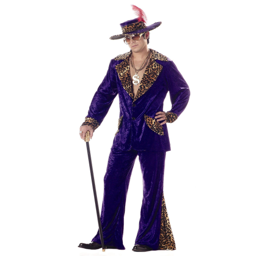

In [4]:
from fastdownload import download_url
dest = 'pimp.jpg'
download_url(urls[3], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'priest photos'


/opt/homebrew/lib/python3.11/site-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


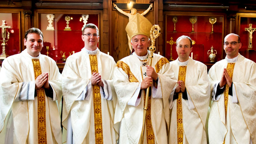

In [5]:
download_url(search_images('priest photos', max_images=4)[3], 'priest.jpg', show_progress=False)
Image.open('priest.jpg').to_thumb(256,256)

In [6]:
searches = 'priest','pimp'
path = Path('pimp_or_priest')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} at church photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} in uniform photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'priest photo'
Searching for 'priest at church photo'
Searching for 'priest in uniform photo'
Searching for 'pimp photo'
Searching for 'pimp at church photo'
Searching for 'pimp in uniform photo'


In [7]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

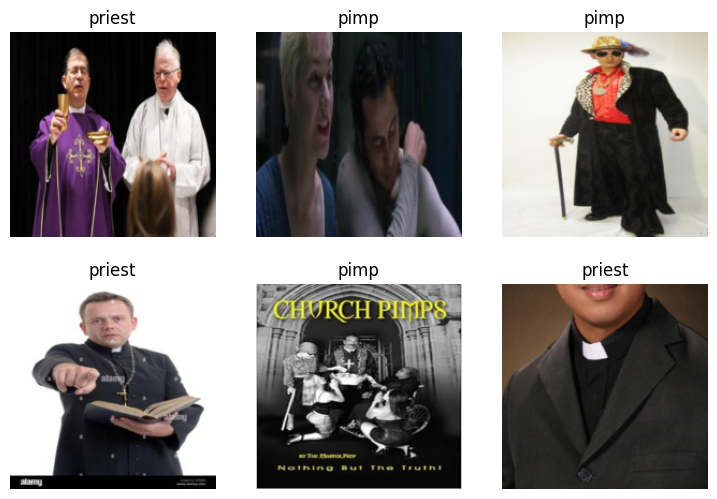

In [8]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.029685,0.611720,0.166667,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.331713,0.440179,0.138889,00:01
1,0.205838,0.410100,0.125000,00:01
2,0.140651,0.404922,0.125000,00:01


In [10]:
is_pimp,_,probs = learn.predict(PILImage.create('pimp.jpg'))
print(f"This is a: {is_pimp}.")
print(f"Probability it's a pimp: {probs[0]:.4f}")

This is a: pimp.
Probability it's a pimp: 1.0000
